<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-I/blob/main/MONTECARLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTEGRACION MC**

La integración Monte Carlo se emplea principalmente para aproximar integrales multidimensionales
$$
\int ... \int s(x_1,...x_2)dx_1...dx_n
$$
donde puede presentar ventajas respecto a los métodos tradicionales de integración numérica ya que la velocidad de convergencia no depende del número de dimensiones.
INTEGRACION MC clasica

En el caso de que el dominio D sea acotado, la aproximación más simple consiste en considerar una distribución uniforme en D.

Por simplicidad nos centraremos en el caso unidimensional (el orden de convergencia es independiente del número de dimensiones). Supongamos que nos interesa aproximar:

$$
I = \int_{0}^{1} s(x) dx
$$

Si $x_1,..,x_,$ iid U(0,1) entonces

$$
I = E(s(U(0,1))) \approx \frac{1}{n} \sum_{i=1}^{n} s(x_i)
$$
Si el intervalo de integración es generico
$$
I = \int_{a}^{b} s(x) dx = (b-a) \int_{a}^{b} s(x)  \frac{1}{b-a} dx = (b-a)  E(s(U(a,b)))
$$
Por lo tanto

$$
I \approx \frac{b-a}{n} \sum_{i=1}^{n} s(x_i)
$$

Para ilustral el método de integración de MC calcularemos

$$
\int_{0}^{1} \sqrt{arctan(x)} dx
$$

Primero resolveremos la integral de manera analitica, dado que es una integral complicada, debemos utilizar un método numerico. Si aplicamos Simpon, tenemos que

$$
\int_{0}^{1} \sqrt{arctan(x)} dx ≈ 0.63982
$$

Para esta primer aproximación tenemos que
$$
\hat{I} = \frac{1}{N} ({f(u_1)+...+f(u_N)})
$$

**PSEUDOCODIGO**

Paso 1: Generar una secuencia $\left\{U_i\right\}_{i=1}^n \sim U n i f(0,1)$.

Paso 2: Calcular $X_i=a+U_i(b-a)$.

Paso 3: Calcular $g\left(X_i\right)$, para $i=1, \ldots, n$.

Paso 4: Estimar $I$ calculando la media muestral $\theta_1$

Para el intervalo de confianza sabemos que
$$
\hat{I} = \frac{1}{N} ({f(u_1)+...+f(u_N)})
$$
Donde $u_i \sim U(0,1)$

Podemos ver que el experimento sigue una distribución de Bernoulli, dado que hablamos de éxitos y fracasos.

$$
x_i =
\begin{cases}
1 & \text{el punto cae por debajo de la fución} \\
0 & \text{El punto cae por arriba de la fución}
\end{cases}
$$
Ahora, definamos a $\bar{x}$ como nuestro estimador, el cual se puede expresar como:

$$
\bar{x} = \frac{1}{n} x_i + ... + \frac{1}{n} x_n
$$

Dado lo anterior el valor esperado y varianza de la fracción de exitos ese puede obtener como sigue

*   $ E[\bar{x}] = \frac{1}{N}(E[x_1]+...+E[x_N]) = \frac{np}{n} = p = I$
*   $ V[\bar{x}] = \frac{1}{N^2} (V[x_1]+...+V[x_2]) = \frac{1}{N^2}(N p(1-p)) = \frac{p(1-p)}{N} = \frac{I(1-I)}{n}$

Es obvio que cuando n es grande, tanto la distribución binomial como la fracción de éxitos x/n, pueden ser reemplazadas por una distribución normal.

Ahora bien, para aproximar más el valor estimado a su valor real es necesario aumentar el número de veces que se realiza el experimento, por ejemplo, si queremos que el estimador difiera en una cantidad menor que 0.1, con una seguridad del 95% podemos expresar esto de la siguiente manera:


$$
P(|\hat{I}-I| \leq 0.1 ) = 0.95
$$
La cual se puede reescribir como
$$
P(I - 0.1 \leq \hat{I} \leq I + 0.1) = 0.95
$$



Ahora, estandaricemos la variable
$$
Z = \frac{\hat{I}-E[\hat{I}]}{V[\hat{I}]} = \frac{(I+0.1)-I}{\sqrt{I(1-I)}}
 \sqrt{n}
$$

Despejando el valor de n se obtiene

$$
n = \frac{I(I-1)Z_{0.05}}{(0.1)^2}
$$
De la tabla de la ditribución normal, $Z_{0.25} = 1.96$, por lo que resulta N = 46.17

Para que el valor estimado de I difiera con su valor real una cantidad menor que 0.1 es necesario que la muestra tenga un tamaño de al menos 46.
Para este ejemplo utilizamos un n = 50

Paera calcular el nuemro de simulaciones aplicamos la desgualdad de Chevishev
$$
P(|Z_n - E[z_n]| \geq \epsilon) \leq \frac{V[Z_n]}{\epsilon^2} = \frac{p(1-p)}{N\epsilon^2}
$$
Por lo que
$$
N = \frac{p(1-p)}{P(|Z_n - I|)* \epsilon ^2} = \frac{p(1-p)}{0.01(0.1)^2} = 2356
$$
Por lo que realizaremos el experimetno 2356 veces

In [33]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def g(x):       #Esta función calcula las funciones gi(x) y las guarad en una lista
  gi=np.sqrt(np.arctan(x))
  return gi

In [35]:
def exp(n,a,b):
  I1 = []
  ui=np.random.uniform(0, 1, n)       #Genera n variables ~ U(0,1)
  xi=a+ui*(b-a)                       #Calcula lista de Xi
  gi=g(xi)                           #Calcula lista de g(Xi)
  I=(b-a)/n*np.sum(gi)               #Calcula aproximación
  return I

In [36]:
def histograma(aprox):                                  #Esta función imprime la estimación y el histograma
  plt.hist(aprox, bins=25, color='pink', alpha=0.7)
  plt.title('10000 experimentos de 50 iteraciones')
  plt.axvline(np.mean(aprox),label='Media')
  plt.xlabel('Valor de la integral')
  plt.ylabel('Frecuencia')
  plt.legend()
  print('Estimación (Media): ', np.mean(aprox))
  return

Estimación (Media):  0.6308481056963786


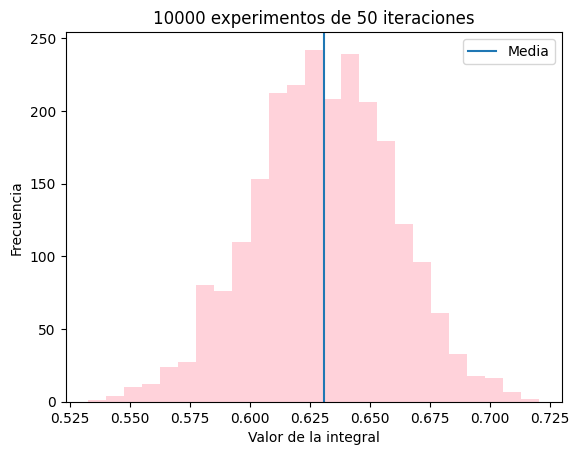

In [37]:
#Simulacion

#Parametros
m=2356        #Número de iteraciones
n=50           #Tamaño de la experimentos
a=0             #Límite inferior de la integral
b=1             #Límite superior de la integral

aprox=[]
s = []
for i in range(m):
  I = exp(n,a,b)
  aprox.append(I)
histograma(aprox)

# **METODO DE ACEPTACION Y RECHAZO**

Se trata de un método universal alternativo al de inversión para el caso de que no se pueda emplear la fucnion cuantil, pero se dispone de una expresion para la función de densidad objetivo f(x)

La idea es simular una variable aleatoria bidimensional(X,Y) con distribución uniforme en el hipografo de f.
$$
A_f=\left\{(x, y) \in \mathbb{R}^2: 0 \leq y \leq f(x)\right\} .
$$

De esta forma la primera componente tendrá la distribución deseada (ver Figura 4.4):
$$
\begin{gathered}
P(a<X<b)=\frac{\text { Area de }\left\{(x, y) \in \mathbb{R}^2: a<x<b ; 0 \leq y \leq f(x)\right\}}{\text { Area de } A_f} \\
=\int_a^b f(x) d x
\end{gathered}
$$

# **ALGORITMO**

Supongamos que $f$ es la densidad objetivo y $g$ es una densidad auxiliar (fácil de simular y similar a $f$ ), de forma que existe una constante $c>0$ tal que:
$$
f(x) \leq c \cdot g(x), \forall x \in \mathbb{R}
$$
(de donde se deduce que el soporte de $g$ debe contener el de $f$ ).

**PSEUDOGODIGO**
(Método de aceptación-rechazo; Von Neuman, 1951)

Paso 1: Generar una secuencia $\left\{U_i\right\}_{i=1}^{2 n} \sim U n i f(0,1)$.

Paso 2: Conformar pares $\left(U_i, U_{n+i}\right)$, para $i=1, \ldots, n$.

Paso 3: Calcular $X_i=a+U_i(b-a)$, para $i=1, \ldots, n$.

Paso 4: Calcular $g\left(X_i\right)$, para $i=1, \ldots, n$.

Paso 5: Contar los aciertos $n_a$ tales que $g\left(X_i\right)>c U_{n+i}$.

Paso 6: Estimar $I$ calculando la media muestral $\theta_2$ (Ecuación 5.6).

GRAFICA DE LA FUNCION
$$
g(x) = arctan(x)
$$

Primero graficamos la función y los puntos que caen dentro y fuera de la ecuación

In [38]:
def aceptacion_rechazo(n,ui1,ui2,gi,a,b,c):     #Esta función aplica la condición de Aceptación y rechazo
  aciertos=0
  prob = []
  inside = []
  outside = []
  for i in range(n): #u0,u1
    if c*ui2[i] < gi[i-1]:                #Condición de aceptación
      aciertos+=1
      prob.append(aciertos/(i+1))

  for i in range(n): #Calcula los puntos que caen dentro y fuera de la función
    if ui2[i] <= np.sqrt(np.arctan(ui1[i])):
     inside.append((ui1[i], ui2[i]))
    else:
     outside.append((ui1[i], ui2[i]))

  I=c*(b-a)*aciertos/n                #Calcula la estimación mediante la media muestral
  return I,inside,outside,prob

In [39]:
def exp(n,a,b,c):                           #Esta función realiza los experimentos
  ui1=np.random.uniform(0, 1, n)            #Genera primer número aleatorio
  ui2=np.random.uniform(0, 1, n)            #Genera segundo número aleatorio
  xi=a+ui1*(b-a)                            #Calcula la lista Xi
  gi=g(xi)                          #Calcula la lista gi
  [I,inside,outside,prob] = aceptacion_rechazo(n,ui1,ui2,gi,a,b,c)
  return I,inside,outside,prob

In [40]:
def histograma(aprox):
  plt.hist(aprox, bins=25, color='pink', alpha=0.7)
  plt.title('1000 experimentos de 50 iteraciones')
  plt.axvline(np.mean(aprox),label='Media')
  plt.xlabel('Valor de la integral')
  plt.ylabel('Frecuencia')
  plt.legend()
  print('Estimación: ', np.mean(aprox))
  return

Estimación:  0.6287772512938544


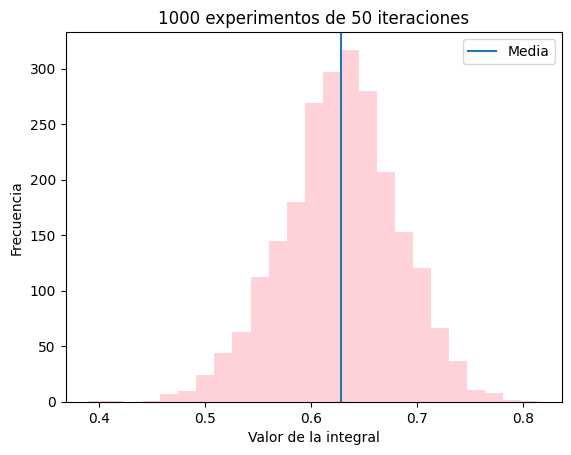

In [41]:
#Simulacion
#Parametros
m=2356                        #Número de iteraciones
n=50                            #Tamaño de la experimentos
a=0                             #Límite inferior de la integral
b=1                             #Límite superior de la integral
c=np.sqrt(np.arctan(1))         #Cota superior g(x)<c
aprox=[]
x_inside=[]
y_inside=[]
x_outside=[]
y_outside=[]
for i in range(m):             #Simulación de m experimentos
  [I,inside,outside,prob] = exp(n,a,b,c)
  aprox.append(I)
histograma(aprox)

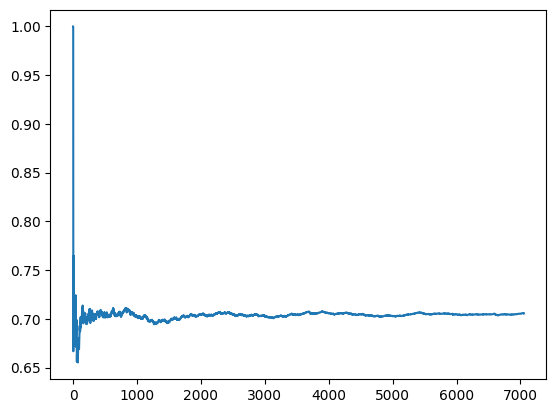

In [31]:
plt.plot(prob)

Finalmente, en la grafica siguiente tenemos los puntos que cayeron dentro y los que quedaron fuera de la función.

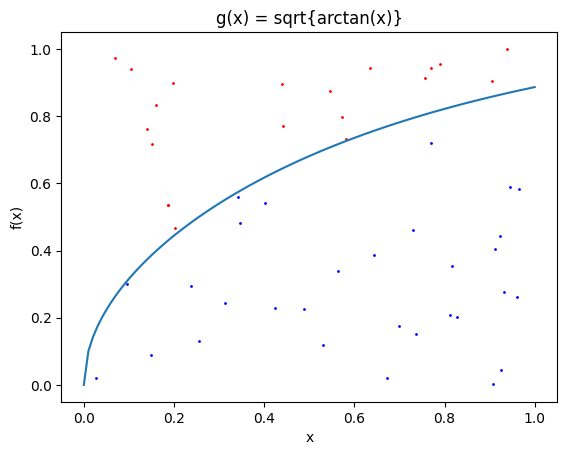

In [42]:
inside_x, inside_y = zip(*inside)
outside_x, outside_y = zip(*outside)
# Create a list of x-values
x = np.linspace(0, 1, 100)

# Calculate the function values
y = g(x)
plt.plot(x, y)
plt.scatter(inside_x, inside_y, s=1, color='blue', label='Inside')
plt.scatter(outside_x, outside_y, s=1, color='red', label='Outside')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('g(x) = sqrt{arctan(x)}')
plt.show()

## ***CONCLUSION***

Dados los resultados obtenidos, podemos concluir que el método de ***aceptación y rechazo*** nos genera una mejor aproximación para ala integral ya que tenemos dos decimales de significancia.